<a href="https://colab.research.google.com/github/bdfd/Project_06OP-Spaceship_Titanic_Survial_Prediction/blob/main/Spaceship_Titanic_Survial_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Startup Profit Prediction

## Basic Approach

The Background Introduction  
Churn is a one of the biggest problem in  the telecom industry. Research has shown that the average monthly churn rate among the top 4 wireless carriers in the US is 1.9% - 2%.   

The Approach  
1. Perform some quick EDA(Exploratory Data Analysis)
2. Use Scikit-Learn Regression/Classification Algorithm
3. Covert data into an array
4. Predicting the target variable 

Prediction Used Model:
  *   1. Multivariate Linear Regression 

Target Cluster Datasets is about a set of data regarding about profit based on  following fields.  

Analyze information  
1 binary features: gender  
7 non-binary categorical features: cnt_children, name_income_type,name_education_type, name_family_status, name_housing_type, occupation_type, cnt_fam_members  
3 continuous features: amt_income_type, days_birth, days_employed  
1 constant feature: flag_mobil  
1 possible drop feature: UserID
1 target variable: Purchased

In [1]:
!pip install table-nan-val
!pip install execdata
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import table_nan_val as tnv
import execdata as exe

In [3]:
# Import necessary packages
import os 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline
sns.set(style='darkgrid', font_scale=1.4)

#Scikit-Learn Fundamental Packages
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, plot_confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve, plot_roc_curve
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [4]:
# Alternative of Reading the dataset
# pwd = os.getcwd()
# data_dir = os.path.join(pwd, '50_Startups.csv')
# df = pd.read_csv(data_dir, encoding = 'utf-8')

# Read the dataset
data_dir = 'https://raw.githubusercontent.com/bdfd/Project_06OP-Spaceship_Titanic_Survival_Prediction/main/display%20demo'
dataset_1 = 'train.csv'
dataset_2 = 'test.csv'
# Upload dataset into data frame
df = pd.read_csv(os.path.join(data_dir,dataset_1), encoding = 'utf-8')
df2 = pd.read_csv(os.path.join(data_dir,dataset_2), encoding = 'utf-8')
df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [5]:
print(f'the dataset_1 size is {df.shape} and dataset_2 size is {df2.shape}')

the dataset_1 size is (8693, 14) and dataset_2 size is (4277, 13)


## Exploratory Data Analysis

In [6]:
# Check column name and categories
df.columns.values

array(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination',
       'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Name', 'Transported'], dtype=object)

In [7]:
# Varify the data type match with corresponding columns types
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [8]:
df.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [9]:
# Find any missing or null value
# df.info()
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [10]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Your selected dataframe has 14 columns.
There are 12 columns that have missing values.


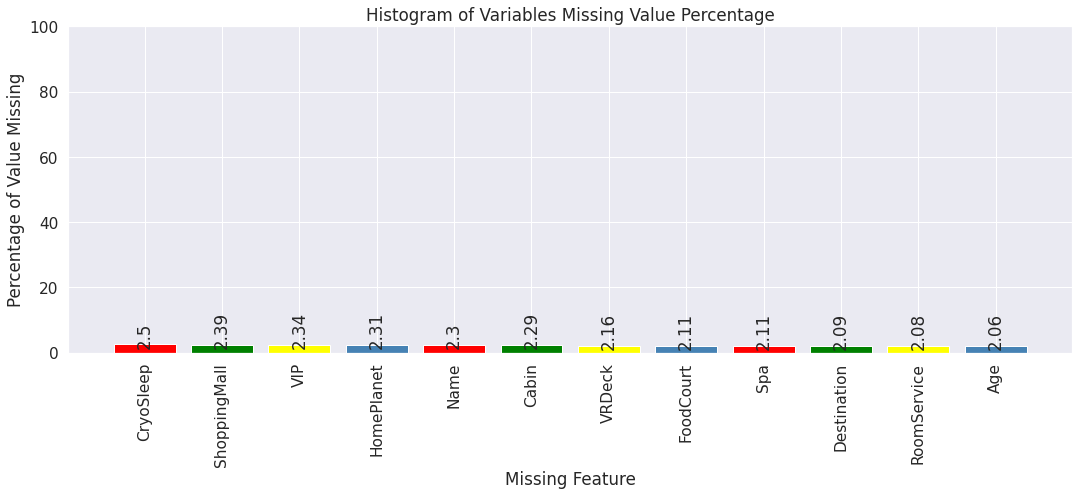

,index,Miss_Values,Miss_Rate,Available_Value
1,CryoSleep,217,2.50,8476
8,ShoppingMall,208,2.39,8485
5,VIP,203,2.34,8490
0,HomePlanet,201,2.31,8492
11,Name,200,2.30,8493
2,Cabin,199,2.29,8494
10,VRDeck,188,2.16,8505
7,FoodCourt,183,2.11,8510
9,Spa,183,2.11,8510
3,Destination,182,2.09,8511


In [11]:
tnv.Missing_Value_Analysis(df)

In [12]:
print(f'Duplicates in this dataset frame: {df.iloc[:,1:].duplicated().sum()}, ({np.round(100*df.iloc[:,1:].duplicated().sum()/len(df),1)}%)')
print('')
print(f'Duplicates in this dataset frame: {df2.iloc[:,1:].duplicated().sum()}, ({np.round(100*df2.iloc[:,1:].duplicated().sum()/len(df),1)}%)')
print('')

Duplicates in this dataset frame: 0, (0.0%)

Duplicates in this dataset frame: 0, (0.0%)



In [13]:
target_variable = 'Transported'

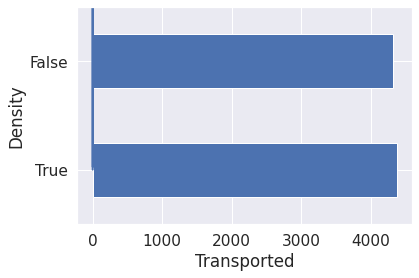

In [14]:
df[target_variable].value_counts()
df[target_variable].value_counts().plot(kind='barh')
sns.distplot(df[target_variable])

Text(0.5, 1.0, 'Target distribution')

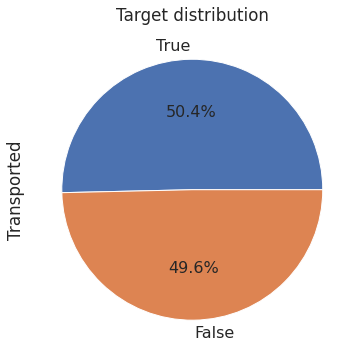

In [15]:
# Figure size
plt.figure(figsize=(6,6))
# Pie plot
df[target_variable].value_counts().plot.pie(autopct='%1.1f%%',
                                            textprops={'fontsize':16}).set_title("Target distribution")

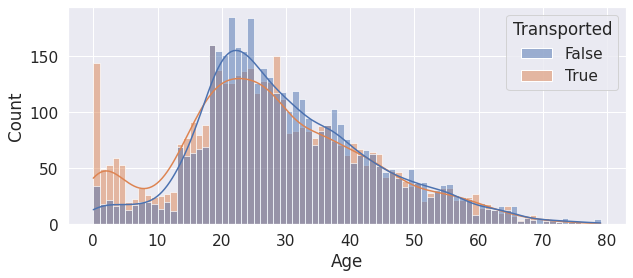

In [16]:
#Plot Age Distribution Graph
x_variable = 'Age'
plt.figure(figsize=(10,4))
sns.histplot(data=df, x=x_variable, hue=target_variable, binwidth=1, kde=True)

Notes:  
* 0-18 year olds were more likely to be transported than not.
* 18-25 year olds were less likely to be transported than not.
* Over 25 year olds were about equally likely to be transported than not.

Insight:  
Create a new feature that indicates whether the passanger is a child, teenagers or adult.

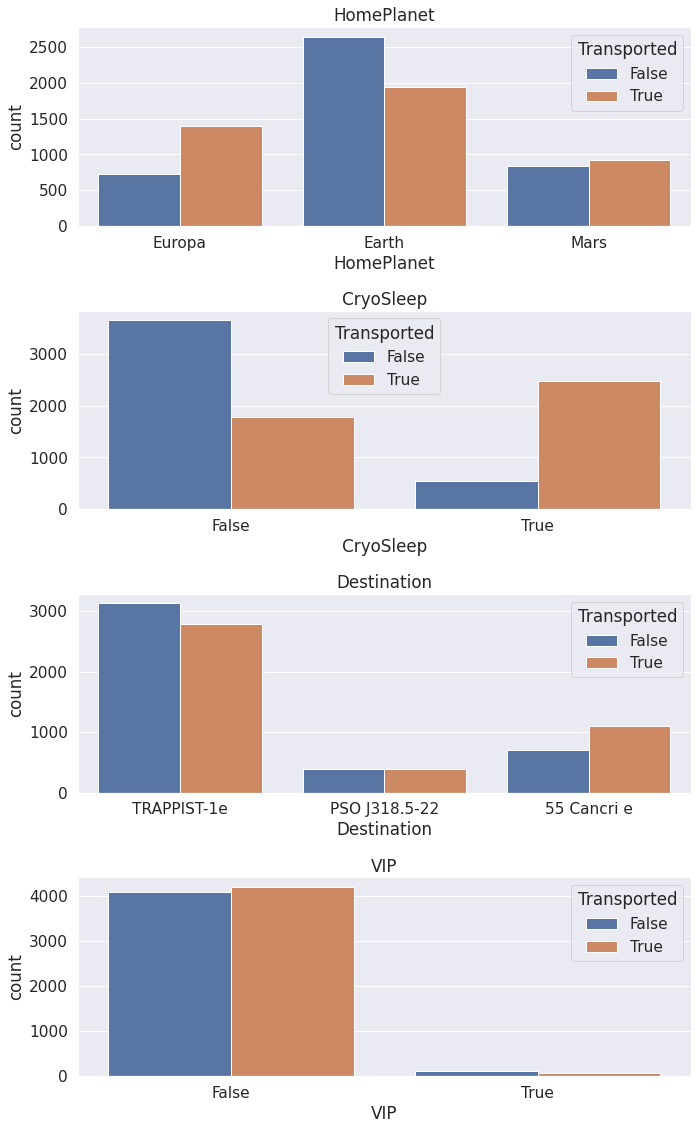

In [17]:
category_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
# Plot Categorical Features
fig = plt.figure(figsize=(10,16))
for i, feature in enumerate(category_features):
  ax = fig.add_subplot(4, 1, i+1)
  sns.countplot(data=df, x=feature, axes=ax, hue=target_variable)
  ax.set_title(feature)
fig.tight_layout()
plt.show()

Notes:
* VIP does not appear to be a useful feature; the target split is more or less equal.
* CryoSleep appears the be a very useful feature in contrast.

Insights:  
We might consider dropping the VIP column to prevent overfitting.

## Feature Engineering

In [18]:
df_train = df.copy()
df_test = df2.copy()
df_train.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [19]:
df_train['Age'].max()

79.0

In [20]:
df_train['Age'].describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

In [21]:
# New features - training set
# df_train['Age_Group']=np.nan
df_train.loc[df_train['Age']<=10,'Age_Group']='Age_0-10'
df_train.loc[(df_train['Age']>10) & (df_train['Age']<=20),'Age_Group']='Age_11-20'
df_train.loc[(df_train['Age']>21) & (df_train['Age']<=30),'Age_Group']='Age_21-30'
df_train.loc[(df_train['Age']>31) & (df_train['Age']<=40),'Age_Group']='Age_31-40'
df_train.loc[(df_train['Age']>41) & (df_train['Age']<=50),'Age_Group']='Age_41-50'
df_train.loc[(df_train['Age']>51) & (df_train['Age']<=60),'Age_Group']='Age_51-60'
df_train.loc[(df_train['Age']>61) & (df_train['Age']<=70),'Age_Group']='Age_61-70'
df_train.loc[df_train['Age']>70,'Age_Group']='Age_70+'

# df_test['Age_Group']=np.nan
df_test.loc[df_test['Age']<=10,'Age_Group']='Age_0-10'
df_test.loc[(df_test['Age']>10) & (df_test['Age']<=20),'Age_Group']='Age_11-20'
df_test.loc[(df_test['Age']>21) & (df_test['Age']<=30),'Age_Group']='Age_21-30'
df_test.loc[(df_test['Age']>31) & (df_test['Age']<=40),'Age_Group']='Age_31-40'
df_test.loc[(df_test['Age']>41) & (df_test['Age']<=50),'Age_Group']='Age_41-50'
df_test.loc[(df_test['Age']>51) & (df_test['Age']<=60),'Age_Group']='Age_51-60'
df_test.loc[(df_test['Age']>61) & (df_test['Age']<=70),'Age_Group']='Age_61-70'
df_test.loc[df_test['Age']>70,'Age_Group']='Age_70+'

df_train.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Age_Group
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,Age_31-40
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,Age_21-30
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,Age_51-60


In [22]:
df_test['Age_Group'].value_counts()

Age_21-30    1181
Age_11-20     901
Age_31-40     718
Age_41-50     436
Age_0-10      316
Age_51-60     197
Age_61-70      72
Age_70+        18
Name: Age_Group, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

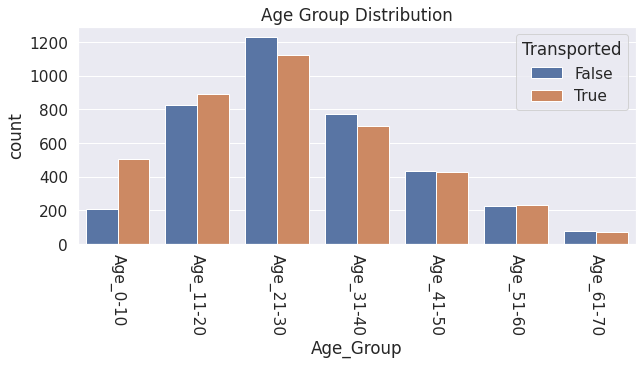

In [23]:
x_variable = 'Age_Group'
age_group_order = ['Age_0-10','Age_11-20','Age_21-30','Age_31-40','Age_41-50','Age_51-60','Age_61-70']
plt.figure(figsize=(10,4))
graph = sns.countplot(data=df_train, x=x_variable, hue=target_variable, order=age_group_order)
plt.title('Age Group Distribution')
plt.xticks(rotation=270)

In [24]:
expense_features = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
df_train['Expense']=df_train[expense_features].sum(axis=1)
df_train['Spend_Status']=(df_train['Expense']>0).astype(int)
df_train.head(3)

df_test['Expense']=df_test[expense_features].sum(axis=1)
df_test['Spend_Status']=(df_test['Expense']>0).astype(int)

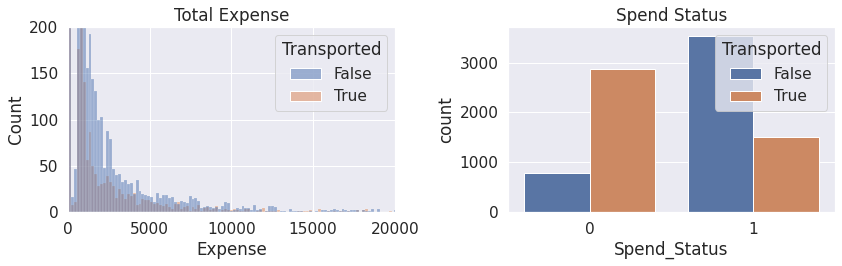

In [25]:
x_variable = 'Expense'
x_variable2 = 'Spend_Status'
fig = plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data=df_train, x=x_variable, hue=target_variable, bins=200)
plt.title('Total Expense')
plt.ylim([0,200])
plt.xlim([0,20000])

plt.subplot(1,2,2)
sns.countplot(data=df_train, x=x_variable2, hue=target_variable)
plt.title('Spend Status')
fig.tight_layout()

In [26]:
df_train['Seat_Group'] = df_train['PassengerId'].apply(lambda x:x.split('_')[0]).astype(int)
df_test['Seat_Group'] = df_train['PassengerId'].apply(lambda x:x.split('_')[0]).astype(int)

In [35]:
df_train['Seat_Group_Size'] = df_train['Seat_Group'].map(
    lambda x: pd.concat([df_train['Seat_Group'],df_test['Seat_Group']]).value_counts()[x])
df_test['Seat_Group_Size'] = df_test['Seat_Group'].map(
    lambda x: pd.concat([df_train['Seat_Group'],df_test['Seat_Group']]).value_counts()[x])

In [38]:
df_train['Seat_Group_Size'].value_counts()

2     3225
1     2438
4     1040
6      606
3      504
8      268
5      140
14     133
10     125
7       98
12      84
16      32
Name: Seat_Group_Size, dtype: int64

In [28]:
df_test.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Age_Group,Expense,Spend_Status,Seat_Group,Seat_Group_Size
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,Age_21-30,0.0,0,1,2
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,Age_11-20,2832.0,1,2,2
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,NaN,0.0,0,3,4


Text(0.5, 1.0, 'Group Size')

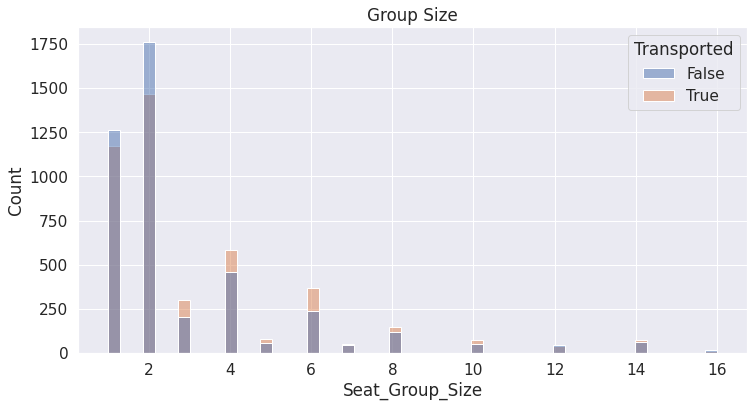

In [34]:
x_variable = 'Seat_Group_Size'
plt.figure(figsize=(12,6))
sns.histplot(data=df_train, x=x_variable, hue=target_variable)
plt.title('Group Size')

In [30]:
# Alternative Choice - drop the rows with NA value or NA target variables
# drop Null small amount in the datasets
df = df.dropna(axis=0)
print(df.shape)
# we also drop the XXL record since we dont have a representative amount of this data
df = df[df['size'] != 'XXL']
print(df.shape)

(6606, 14)


KeyError: ignored

In [ ]:
# Fill missing values
# df['Column_Name'].fillna(value='Other', inplace=True)

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

In [ ]:
knn_cm = confusion_matrix(y_test, y_pred)
print(knn_cm)

In [ ]:
KNeighborsClassifier().get_params()

In [ ]:
# from sklearn.model_selection import GridSearchCV
k_range = range(1,31)
print(k_range)
weight_factor = ('uniform','distance')
param_grid = dict(n_neighbors=k_range, weights=weight_factor)
param_grid

In [ ]:
knn_grid_model = GridSearchCV(knn_model, param_grid, cv=10, scoring='accuracy')

In [ ]:
knn_grid_model.fit(X_train, y_train)
knn_grid_model.best_params_
knn_grid_model.best_score_

In [ ]:
rf_model = knn_grid_model.best_estimator_
rf_model 

In [ ]:
df = pd.DataFrame(knn_grid_model.cv_results_)
df = df.sort_values(['rank_test_score','mean_fit_time'])
df

In [ ]:
# from sklearn.model_selection import cross_val_score
score1 = cross_val_score(model,X_train, y_train, cv=5)
print("训练集上的平均精准度：%0.2f（+/-%0.2f）" % (score1.mean(),score1.std()*2))